In [269]:
import numpy as np
import pandas as pd
import re

텍스트 데이터 전처리 순서

1. 특수문자 대체, 중복 띄어쓰기 제거
2. 토큰화
3. 표제어 추출
4. 불용어 제거
5. 빈도수 계산
6. 시각화

In [270]:
df = pd.read_csv('dataset_kr.csv')

In [271]:
df

,기사 제목,발행일,내용,언론사,출처
0,"«Hellbound», la nuova «Squid Game»? Un altro h...",25 novembre 2021,Un’inspiegabile maledizione in formato video i...,corriere della sera,https://www.corriere.it/esteri/21_novembre_25/...
1,"Corea, che passione",7 novembre 2021,"Squid Game, la serie televisiva dei record, am...",corriere della sera,https://corrieredelveneto.corriere.it/veneto/c...
2,"Squid game, anche a Napoli esplode la mania. A...",9 ottobre 2021,Nel giro di pochi giorni è diventato uno dei c...,corriere della sera,https://corrieredelmezzogiorno.corriere.it/nap...
3,"«Squid Game», tutto quello che c’è da sapere s...",6 OTTOBRE 2021,"“Squid Game”, un trionfo inatteso\nSenza inves...",corriere della sera,https://www.corriere.it/spettacoli/cinema-seri...
4,Altre due star morte misteriosamente a Seul,26 gennaio 2021,Il lato oscuro dello star system sudcoreano ha...,corriere della sera,https://www.corriere.it/esteri/21_gennaio_26/a...
...,...,...,...,...,...
75,"BTS, ecco come i campioni del K-pop potranno e...",19 AGOSTO 2022,I sette ragazzi del gruppo di K-pop coreano BT...,la repubblica,https://www.repubblica.it/spettacoli/cinema/20...
76,"Pachinko', il riscatto di una vita migrante. Y...",28 MARZO 2022,Ottant’anni di storia familiare attraverso Cor...,la repubblica,https://www.repubblica.it/serietv/appletvplus/...
77,Han Kang: il romanzo è vivo e abita in Corea,21 FEBBRAIO 2021,"\nTalvolta oggi, in Italia, abbiamo l'impressi...",la repubblica,https://www.repubblica.it/robinson/2021/02/21/...
78,"POP ALLA COREANA, COSÌ IL FENOMENO K-POP CONQU...",23 gennaio 2022,La Corea è trend: il film Oscar Parasite di Bo...,ANSA,https://www.ansa.it/canale_lifestyle/notizie/t...


In [272]:
# 데이터 결측값 제거

print("데이터 결측값 제거 전 col. 수: {}".format(df.shape[0]))
df = df.dropna(axis=0)
print("데이터 결측값 제거 후 col. 수: {}".format(df.shape[0]))

데이터 결측값 제거 전 col. 수: 80
데이터 결측값 제거 후 col. 수: 80


In [273]:
# 개행문자 제거, 전체 텍스트 소문자로 통일, 특수문자 제거
def preprocessing(text):
    text = str(text)
    
    text.replace("\n", " ")
    
    text = text.lower()
    
    text = re.sub(r"[^\w]", " ", text)
    return text if text else None


# 공란 처리
def delete_space(text):
    text = ' '.join(text.split())
    return text

In [274]:
df['내용'].head(5)

0    Un’inspiegabile maledizione in formato video i...
1    Squid Game, la serie televisiva dei record, am...
2    Nel giro di pochi giorni è diventato uno dei c...
3    “Squid Game”, un trionfo inatteso\nSenza inves...
4    Il lato oscuro dello star system sudcoreano ha...
Name: 내용, dtype: object

In [275]:
df['내용'] = df[['내용']].apply(lambda x: preprocessing(x['내용']), axis=1)

df['내용'].head(5)

0    un inspiegabile maledizione in formato video i...
1    squid game  la serie televisiva dei record  am...
2    nel giro di pochi giorni è diventato uno dei c...
3     squid game   un trionfo inatteso senza invest...
4    il lato oscuro dello star system sudcoreano ha...
Name: 내용, dtype: object

In [276]:
df['내용'] = df[['내용']].apply(lambda x: delete_space(x['내용']), axis=1)

df['내용'].head(5)

0    un inspiegabile maledizione in formato video i...
1    squid game la serie televisiva dei record amat...
2    nel giro di pochi giorni è diventato uno dei c...
3    squid game un trionfo inatteso senza investire...
4    il lato oscuro dello star system sudcoreano ha...
Name: 내용, dtype: object

In [277]:
# 불용어 제거 전 빈도 분석
from collections import Counter

result = " ".join(df['내용'].tolist())
count = Counter(result.split(" "))

count.most_common(15)

[('di', 1505),
 ('e', 1045),
 ('la', 871),
 ('il', 848),
 ('che', 775),
 ('un', 694),
 ('in', 661),
 ('a', 594),
 ('è', 581),
 ('per', 479),
 ('i', 447),
 ('del', 446),
 ('una', 394),
 ('con', 361),
 ('l', 334)]

In [278]:
# spaCy 모듈 import
import spacy
from spacy.lang.it.examples import sentences

In [279]:
nlp = spacy.load('it_core_news_sm')

In [280]:
# 토큰화
def tokenizer(data):
    doc = nlp(data)
    tokens = list()
    for token in doc:
        tokens.append(token.text)
    return tokens

tokenized = []
for i in range(len(df)):
    tokenized.append(tokenizer(df['내용'][i]))
print(tokenized)

[['un', 'inspiegabile', 'maledizione', 'in', 'formato', 'video', 'incolla', 'allo', 'schermo', 'milioni', 'di', 'utenti', 'occidentali', 'come', 'drogati', 'dal', 'sangue', 'non', 'possono', 'fare', 'a', 'meno', 'di', 'scene', 'sempre', 'più', 'splatter', 'trame', 'sempre', 'più', 'nichiliste', 'poteri', 'sempre', 'più', 'sanguinosi', 'e', 'ne', 'vogliono', 'ancora', 'e', 'ancora', 'la', 'dipendenza', 'è', 'così', 'forte', 'che', 'non', 'li', 'scoraggia', 'nemmeno', 'l', 'audio', 'i', 'filmati', 'dell', 'orrore', 'sono', 'solamente', 'in', 'coreano', 'per', 'chi', 'non', 'si', 'rassegna', 'c', 'è', 'al', 'massimo', 'il', 'doppiaggio', 'in', 'inglese', 'ha', 'un', 'che', 'di', 'trama', 'horror', 'a', 'sua', 'volta', 'la', 'cronaca', 'dell', 'ascesa', 'irresistibile', 'di', 'squid', 'game', 'prima', 'e', 'ora', 'della', 'serie', 'ancora', 'più', 'violenta', 'e', 'cupa', 'hellbound', 'sempre', 'sudcoreana', 'ora', 'ai', 'vertici', 'delle', 'classifiche', 'd', 'ascolto', 'in', 'streaming',

In [281]:
import collections

# 표제어 추출
def lemmatizer(data):
    doc = nlp(data)
    tokens = []
    for token in doc:
        tokens.append(token.lemma_)
    return tokens


lemmartized = []
for i in range(len(df)):
    lemmartized.append(lemmatizer(df['내용'][i]))

# print(lemmartized)

result = sum(lemmartized, [])

# 단어 개수 계산
counts = collections.Counter(result)

counts.most_common(20)

[('il', 2563),
 ('di', 1512),
 ('essere', 1189),
 ('uno', 1149),
 ('e', 1081),
 ('di il', 1048),
 ('che', 775),
 ('a', 669),
 ('in', 661),
 ('avere', 631),
 ('a il', 490),
 ('per', 479),
 ('in il', 384),
 ('con', 361),
 ('non', 331),
 ('si', 293),
 ('da', 277),
 ('l', 269),
 ('più', 266),
 ('da il', 217)]

In [282]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords', quiet=True)

sw_it = set(stopwords.words('italian'))
print(sw_it)

{'come', 'aveste', 'fu', 'fummo', 'avresti', 'stavo', 'da', 'perché', 'chi', 'avuto', 'avendo', 'ed', 'stavamo', 'abbiate', 'facemmo', 'tue', 'le', 'starebbero', 'suoi', 'lui', 'faremo', 'con', 'sarebbe', 'facciate', 'faccia', 'stava', 'quale', 'su', 'che', 'avevate', 'dello', 'avrei', 'erano', 'ebbe', 'ai', 'dai', 'quanta', 'avevi', 'facessimo', 'ci', 'siamo', 'faranno', 'stemmo', 'alle', 'del', 'col', 'li', 'avrete', 'farò', 'contro', 'lei', 'questi', 'sareste', 'saranno', 'avrebbe', 'faceva', 'questa', 'queste', 'sugl', 'avremmo', 'avuti', 'avute', 'sia', 'fui', 'gli', 'stanno', 'starei', 'vi', 'stetti', 'starai', 'sarei', 'stando', 'fai', 'stavate', 'dove', 'abbia', 'eri', 'quanto', 'staremmo', 'la', 'dei', 'mia', 'e', 'avrai', 'feci', 'degl', 'io', 'hai', 'dal', 'l', 'nostre', 'sarò', 'sarete', 'dalla', 'stareste', 'nelle', 'sarà', 'furono', 'facevo', 'starò', 'abbiamo', 'una', 'sullo', 'quanti', 'mi', 'all', 'starete', 'è', 'a', 'alla', 'stavano', 'quelle', 'facessi', 'non', 'ste

In [283]:
for stopword in sw_it:
    if stopword in counts.keys():
        del counts[stopword]

counts_df_kr = pd.DataFrame(counts.most_common(), columns=['parola', 'totale'])

counts_df_kr.head(20)

,parola,totale
0,essere,1189
1,di il,1048
2,avere,631
3,a il,490
4,in il,384
5,da il,217
6,pop,152
7,fare,149
8,anno,148
9,su il,136


In [284]:
sw_it.update(['essere', 'avere', 'fare', 'potere', 'di il', 'a il', 'in il', 'da il', 'su il'])

for stopword in sw_it:
    if stopword in counts.keys():
        del counts[stopword]

counts_df_kr = pd.DataFrame(counts.most_common(), columns=['parola', 'totale'])
counts_df_kr.to_excel("counts_df_kr.xlsx")

counts_df_kr.head(20)

,parola,totale
0,pop,152
1,anno,148
2,serie,122
3,film,121
4,k,116
5,coreano,111
6,altro,106
7,molto,105
8,corea,104
9,primo,97


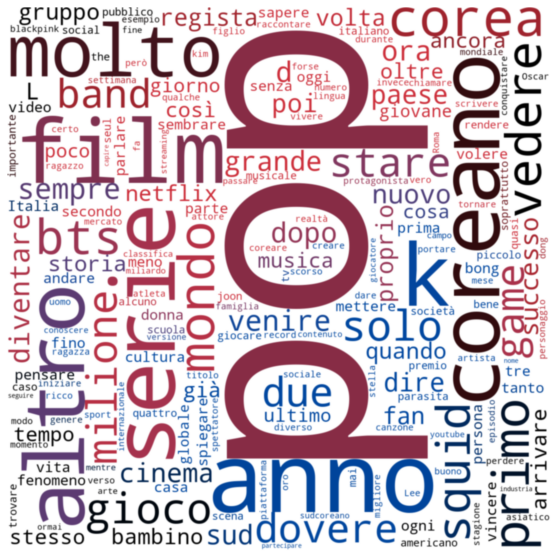

In [285]:
from numpy.random import randint
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

mask = np.array(Image.open('flag_kr.png'))

wc = WordCloud(background_color="rgb(255, 255, 255)", width=800, height=600, max_words=200, mask=mask,
              color_func=ImageColorGenerator(mask)).generate_from_frequencies(counts)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(wc, interpolation="bicubic")
plt.savefig('result_kr.png')
plt.show()